In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
default_of_credit_card_clients = fetch_ucirepo(id=350) 
  
# data (as pandas dataframes) 
X = default_of_credit_card_clients.data.features 
y = default_of_credit_card_clients.data.targets 
  
# metadata 
#print(default_of_credit_card_clients.metadata) 
  
# variable information 
#print(default_of_credit_card_clients.variables) 


In [3]:
df_credit = pd.DataFrame(data = X)

In [4]:
df_credit['class']= y

In [5]:
# Imbalanced dataset
df_credit['class'].value_counts()

class
0    23364
1     6636
Name: count, dtype: int64

In [6]:
# split dataset by default and not default credit clients
df_credit1 = df_credit[df_credit['class'] == 1]
df_credit0 = df_credit[df_credit['class'] == 0]

In [7]:
# Equal Distribution of classes within Credit dataset
df_credit1_split = df_credit1.head(6000)
df_credit0_split = df_credit0.head(6000)

In [8]:
# Equal Distribution of classes within Credit small dataset
df_credit1_sm = df_credit1.head(150)
df_credit0_sm = df_credit0.head(150)

In [8]:
df_credit1_split.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,class
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.00000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.00000,6000.000000,6000.0
mean,130346.280000,1.575000,1.886333,1.532833,35.584333,0.666167,0.453667,0.357333,0.242667,0.168167,...,41729.236667,39401.08400,38123.879333,3376.308500,3382.900667,3290.869667,3160.334833,3272.41850,3374.195667,1.0
std,115404.994285,0.494384,0.720532,0.525644,9.674269,1.381077,1.501409,1.499785,1.493927,1.473855,...,63451.363699,60825.34094,58991.066456,9531.719736,11515.402462,11083.332606,11468.261454,12266.79479,12992.399325,0.0
min,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-65167.000000,-46627.00000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.0
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2287.250000,1485.75000,1147.750000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.0
50%,90000.000000,2.000000,2.000000,2.000000,34.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,19123.000000,18507.50000,18089.500000,1641.000000,1527.500000,1200.000000,1000.000000,1000.00000,1000.000000,1.0
75%,200000.000000,2.000000,2.000000,2.000000,42.000000,2.000000,2.000000,2.000000,2.000000,0.000000,...,50008.250000,47764.00000,47251.750000,3459.000000,3300.000000,3000.000000,2859.000000,3000.00000,2923.000000,1.0
max,740000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,7.000000,8.000000,8.000000,8.000000,...,548020.000000,547880.00000,514975.000000,300000.000000,358689.000000,234456.000000,432130.000000,332000.00000,345293.000000,1.0


In [9]:
# merge subsets of data together
df_credit10 = pd.concat( [df_credit1_split,df_credit0_split] ,ignore_index = True)

In [10]:
#small credit subset 
df_credit10_sm = pd.concat( [df_credit1_sm,df_credit0_sm] ,ignore_index = True)

In [10]:
df_credit10.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,class
count,12000.000000,12000.000000,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,...,12000.00000,12000.000000,12000.000000,12000.000000,1.200000e+04,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,152204.473333,1.581500,1.849083,1.55475,35.502417,0.246250,0.078083,0.026833,-0.058000,-0.101667,...,41171.91000,39356.580750,37986.083250,4786.867667,4.963574e+03,4090.299167,4132.194333,4156.579250,4539.841000,0.500000
std,126233.528514,0.493334,0.753340,0.52649,9.430787,1.263821,1.343864,1.339563,1.301644,1.279961,...,62760.58811,60475.780013,59569.619105,13336.046461,2.182591e+04,14944.514524,13683.416416,13821.354344,16560.260409,0.500021
min,10000.000000,1.000000,0.000000,0.00000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.00000,-46627.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.00000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2097.75000,1548.750000,1050.000000,390.000000,3.800000e+02,51.500000,0.000000,0.000000,0.000000,0.000000
50%,120000.000000,2.000000,2.000000,2.00000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18733.50000,18104.500000,17243.000000,2000.000000,1.891000e+03,1400.000000,1200.000000,1300.000000,1153.000000,0.500000
75%,220000.000000,2.000000,2.000000,2.00000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,49939.25000,48631.500000,47627.500000,4505.500000,4.150000e+03,3594.000000,3500.000000,3597.000000,3500.000000,1.000000
max,1000000.000000,2.000000,6.000000,3.00000,75.000000,8.000000,7.000000,8.000000,8.000000,8.000000,...,891586.00000,927171.000000,961664.000000,368199.000000,1.684259e+06,896040.000000,497000.000000,379267.000000,528666.000000,1.000000


# Data Preprocessing

In [11]:
# Divide into test and training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_credit10.iloc[:,:-1].values, df_credit10.iloc[:,-1].values, test_size = 0.2, random_state = 0)

In [12]:
# Apply standard scaling to training and test data to normalize data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)
X_sc = sc.transform(df_credit10.iloc[:,:-1].values)
X_small_cd = sc.transform(df_credit10_sm.iloc[:,:-1].values)

In [99]:
# normalized features across entire dataset
X_sc = sc.fit_transform(df_credit10.iloc[:,:-1].values)

In [13]:
# class variables
y10 = df_credit10.iloc[:,-1].values
y10 = y10.reshape(len(y10),1)
y_s = df_credit10_sm.iloc[:,-1].values
y_s = y_s.reshape(len(y_s),1)

In [17]:
# class distribution value counts on training data
np.unique(y_train, return_counts = True)


(array([0, 1], dtype=int64), array([4783, 4817], dtype=int64))

In [15]:
X_train.shape

(9600, 23)

# Defined Model Functions

In [25]:
# Defined functions
def sigmoid(x):
    x = np.clip(x, -500, 500)
    result = 1 / (1 + np.exp(-x))
    return result   
    #max_x = np.max(x)
    #result = np.exp(x - max_x) / np.sum(np.exp(x - max_x))
    #return result

def sigmoid_derivative(x):
    smallvalue = 1e-5
    return x * (1 - x) + smallvalue
    #return x * (1 - x) 

def minimize_loss(output,target):
    return np.sum( 1/2 * np.square(target-output) )

def predictions (output):
    predictions = np.zeros_like(output)
    for i in range(len(output)):
        if output[i] > 0.5:
            predictions[i] = 1
        else: 
            predictions[i] = 0
    return predictions


In [26]:
# Neural Network function retreiving optimized weights and biases
def neural_network_fit(X,y1):

    # Initialize weights and biases
    input_neurons = 23
    hidden_neurons = 23
    output_neurons = 1
    
    np.random.seed(42)
    W1 = np.random.uniform(size=(input_neurons, hidden_neurons))
    b1 = np.random.uniform(size=(1, hidden_neurons))
    W2 = np.random.uniform(size=(hidden_neurons, output_neurons))
    b2 = np.random.uniform(size=(1, output_neurons))
    y1 = y1.reshape(len(y1),1)
    
    # Training parameters
    learning_rate = 0.5
    epochs = 15000
    
    # Training loop
    for epoch in range(epochs):
        # Forward propagation
        hidden_input = np.dot(X, W1) + b1
        hidden_output = sigmoid(hidden_input)  
        final_input = np.dot(hidden_output, W2) + b2
        final_output = sigmoid(final_input)
            
        # Calculate error
        error = y1 - final_output
        
        # Calculate loss
        loss = minimize_loss(final_output, y1)
        if epoch % 1000 == 0:        
            print(f"loss is {loss}")
            #print(f"error is {error}")
            
        # Backpropagation
        bp_output = error * sigmoid_derivative(final_output)
        output_bp_grad = bp_output.T.dot(hidden_output)
        error_hidden_layer = bp_output.dot(W2.T)

        bp_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_output)

        
        # Update weights and biases using gradient descent
        W2 += output_bp_grad.T * learning_rate
        b2 += np.sum(bp_output, axis=0, keepdims=True) * learning_rate
        W1 += X.T.dot(bp_hidden_layer) * learning_rate
        b1 += np.sum(bp_hidden_layer, axis=0, keepdims=True) * learning_rate

    print("Output after training:")
    return W1,W2,b1,b2
    #return final_output

In [27]:
# functions for predicting class labels
def neural_network_predict(X,w1,w2,b1,b2):
    # Forward propagation
    h_input = np.dot(X, w1) + b1
    h_output = sigmoid(h_input)   
    f_input = np.dot(h_output, w2) + b2
    f_output = sigmoid(f_input)
    return predictions(f_output)

In [42]:
# Training data fit function
W_n1, W_n2, b_n1,b_n2 = neural_network_fit(X_train_sc, y_train)

loss is 2112.5997746542716
loss is 1365.5926416385803
loss is 1205.9492731910098
loss is 1134.1523706180103
loss is 1131.1943970625994
loss is 1123.956165482349
loss is 1159.303669046914
loss is 1109.6241012593239
loss is 1095.1563987597945
loss is 1096.8063753274273
loss is 1082.5408740301914
loss is 1087.253345641511
loss is 1068.1480152949084
loss is 1089.8984883302958
loss is 1092.3904107711774
Output after training:


In [31]:
# fit function on smaller dataset 
W_sm1, W_sm2, b_sm1,b_sm2 = neural_network_fit(X_small_cd, y_s)

loss is 66.77935293195712
loss is 5.023224245521613
loss is 4.979737917575211
loss is 4.508128245899158
loss is 4.474435177426638
loss is 3.5154428750778193
loss is 3.5074218037436777
loss is 3.5051026358041515
loss is 3.5039726976749326
loss is 3.5032886515245565
loss is 3.502820486499744
loss is 3.5024763721198475
loss is 3.5022113838573556
loss is 3.502000362672882
loss is 3.5018278040466413
Output after training:


In [32]:
# prediction on smaller dataset
y_pred_sm = neural_network_predict(X_small_cd,W_sm1, W_sm2, b_sm1,b_sm2)

In [43]:
# prediction on training set
y_pred_train = neural_network_predict(X_train_sc,W_n1, W_n2, b_n1,b_n2)

In [44]:
# prediction on test results
y_pred_test = neural_network_predict(X_test_sc,W_n1, W_n2, b_n1,b_n2)

# Model Evaluation and Accuracy

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_s = confusion_matrix(y_s,y_pred_sm)
print(cm_s)
accuracy_score(y_s,y_pred_sm)

[[147   3]
 [  4 146]]


0.9766666666666667

In [45]:
## accuracy with 23 hidden layer sizes on training data
cm = confusion_matrix(y_train, y_pred_train)
print(cm)
accuracy_score(y_train, y_pred_train)

[[4090  693]
 [1460 3357]]


0.7757291666666667

In [207]:
# Measuring accuracy (precision and f1-score) on training dataset
from sklearn.metrics import classification_report
print('---------- TRAINING RESULTS ----------')
print(classification_report(y_train, y_pred_train))

---------- TRAINING RESULTS ----------
              precision    recall  f1-score   support

           0       0.74      0.86      0.79      4783
           1       0.83      0.70      0.76      4817

    accuracy                           0.78      9600
   macro avg       0.78      0.78      0.77      9600
weighted avg       0.78      0.78      0.77      9600



In [146]:
    print('---------- Test RESULTS ----------')
    print(classification_report(y_test, y_pred_test))

---------- Test RESULTS ----------
              precision    recall  f1-score   support

           0       0.66      0.77      0.71      1217
           1       0.71      0.60      0.65      1183

    accuracy                           0.68      2400
   macro avg       0.69      0.68      0.68      2400
weighted avg       0.69      0.68      0.68      2400



In [145]:
# Measuring accuracy on test data
cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)
accuracy_score(y_test, y_pred_test)

[[933 284]
 [477 706]]


0.6829166666666666

In [160]:
 #K-fold cross-validation getting average 
from sklearn.model_selection import KFold

kf = KFold(n_splits=4, shuffle=True, random_state=42) 
accuracies = [] 
for train_index, test_index in kf.split(X_sc): 
    X_tn, X_te = X_sc[train_index], X_sc[test_index] 
    y_tn, y_te = y10[train_index], y10[test_index] 
# Train the neural network 
    W1, b1, W2, b2 = neural_network_fit(X_tn, y_tn) 
# Make predictions 
    y_pre = neural_network_predict(X_te, W1, b1, W2, b2) 
# Calculate accuracy 
    accuracy = accuracy_score(y_te, y_pre) 
    accuracies.append(accuracy) 
# Print classification report for each fold 
    print(classification_report(y_te, y_pre, target_names=["Class 0", "Class 1"])) 
# Calculate average accuracy 
    avg_accuracy = np.average(accuracies) 
    print(f"Avg accuracy: {avg_accuracy * 100:.2f}%")

loss is 1988.579239493045
loss is 1568.9349817570503
loss is 1125.47974339731
loss is 1063.9982320936103
loss is 1039.5827752998314
loss is 1029.37448191557
loss is 1032.70048945946
loss is 1010.4931845576428
loss is 996.1135564795003
loss is 1010.031365494728
loss is 1007.0053817965019
loss is 1001.6326898409538
loss is 1010.5299175452147
loss is 1018.6401618671094
loss is 1019.3024808305333
Output after training:
              precision    recall  f1-score   support

     Class 0       0.64      0.75      0.69      1473
     Class 1       0.71      0.60      0.65      1527

    accuracy                           0.67      3000
   macro avg       0.68      0.67      0.67      3000
weighted avg       0.68      0.67      0.67      3000

Average accuracy: 67.03%
loss is 1995.8809552245189
loss is 1326.8588362966125
loss is 1159.8808468812979
loss is 1127.0671220529825
loss is 1111.60217958487
loss is 1056.1523335675754
loss is 1109.6156616087853
loss is 1027.9546806271337
loss is 1064.89

In [168]:
target_names = ['Default', 'Not Default']

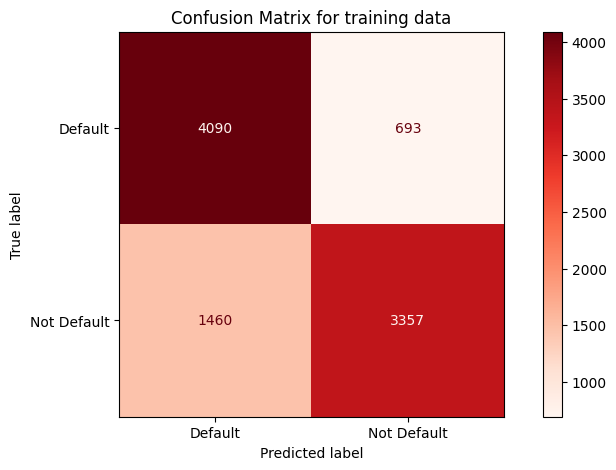

In [169]:
from sklearn.metrics import *
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_train, y_pred, ax=ax, cmap="Reds")
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)
_ = ax.set_title(
    f"Confusion Matrix for training data"
)

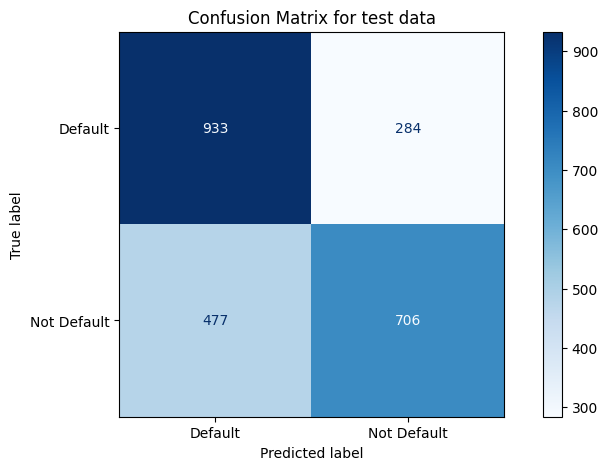

In [170]:
from sklearn.metrics import *
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, ax=ax, cmap="Blues")
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)
_ = ax.set_title(
    f"Confusion Matrix for test data"
)

In [38]:
from sklearn.metrics import roc_curve, auc, f1_score

In [46]:
f1 = f1_score(y_test, y_pred_test)
f1_train = f1_score(y_train, y_pred_train)
print(f'F1 Score of training data: {f1_train:.2f}')
print(f'F1 Score of test data: {f1:.2f}')

F1 Score of training data: 0.76
F1 Score of test data: 0.65


In [52]:
# fpr on test dataset
fpr, tpr, _ = roc_curve(y_test, y_pred_test) 
roc_auc = auc(fpr, tpr)
# fpr on small dataset
fpr_sm, tpr_sm, _ = roc_curve(y_s, y_pred_sm) 
roc_auc_sm = auc(fpr_sm, tpr_sm)

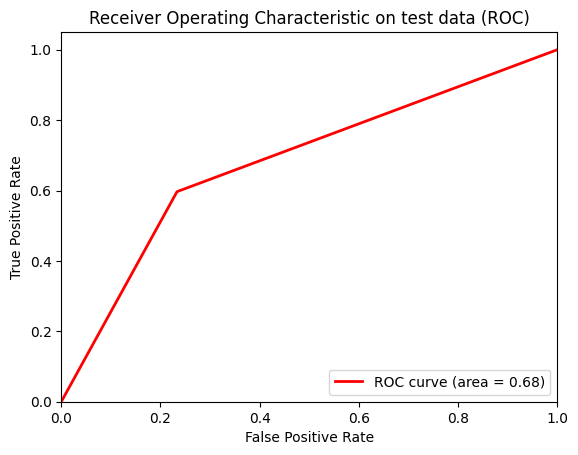

In [53]:
# Roc curve on test dataset
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
#plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic on test data (ROC)')
plt.legend(loc="lower right")
plt.show()


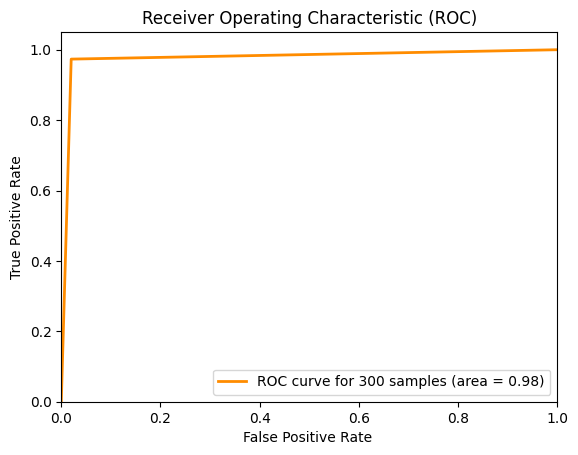

In [50]:
# Roc curve on small dataset
plt.figure()
plt.plot(fpr_sm, tpr_sm, color='darkorange', lw=2, label=f'ROC curve for 300 samples (area = {roc_auc_sm:.2f})')
#plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


# Model Comparison with inbuilt Libraries

In [182]:
# Comparison using sklearn libraries MLP Classifier
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes = 23, activation = 'logistic', learning_rate_init = 0.5, batch_size=10, 
                    solver='lbfgs',random_state=0, max_iter=5000).fit(X_train_sc, y_train)

In [183]:
y_pred_mlp_test = mlp.predict(X_test_sc)

In [203]:
## accuracy with 23 hidden layer sizes on test data against 
cm_mlp = confusion_matrix(y_test, y_pred_mlp_test_i)
print(cm_mlp)
accuracy_score(y_test, y_pred_mlp_test)

[[781 436]
 [461 722]]


0.67625

In [16]:
# Ann using Tensor Flow
import tensorflow as tf
ann_sc = tf.keras.models.Sequential()
# Adding the input layer and the first hidden layer
ann_sc.add(tf.keras.layers.Dense(units=23, activation='sigmoid'))
# Adding the output layer
ann_sc.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
# Compiling the ANN
ann_sc.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann_sc.fit(X_train_sc, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5220 - loss: 0.7966
Epoch 2/200
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6442 - loss: 0.6328
Epoch 3/200
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6565 - loss: 0.6162
Epoch 4/200
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6625 - loss: 0.6095
Epoch 5/200
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6705 - loss: 0.6034
Epoch 6/200
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6806 - loss: 0.6029
Epoch 7/200
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6711 - loss: 0.6030
Epoch 8/200
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6794 - loss: 0.6022
Epoch 9/200
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6822 - loss: 0.5935
Epoch 10/200
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6795 - loss: 0.5922
Epoch 11/200
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6937 - loss: 0.5865
Epoch 12/200
300/300 ━━━━━━━━━━━━━━━━━━━━

In [23]:
y_am_output = ann_sc.predict(X_test_sc)

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [28]:
y_am_pred = predictions(y_am_output)

In [29]:
# Accuracy on tensor flow 
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, y_am_pred)

0.705

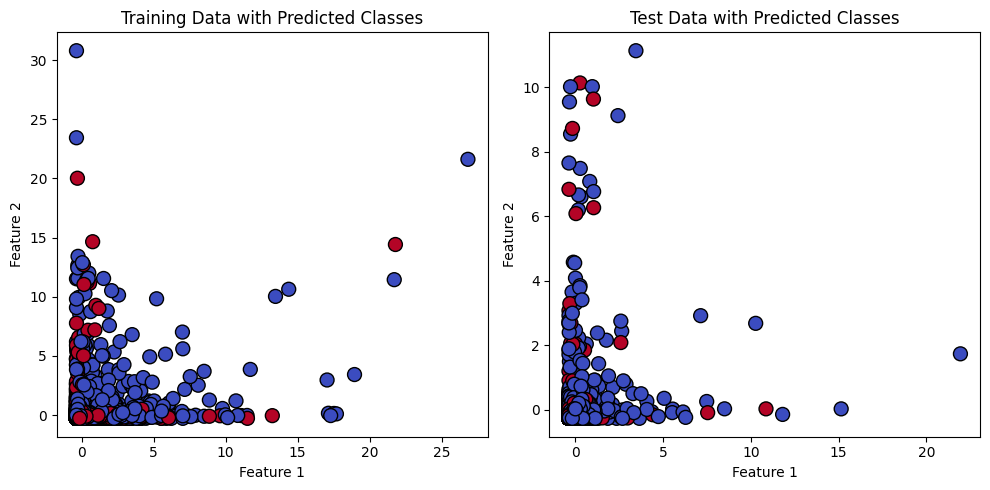

In [198]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


# Predict classes for the training and test data
y_pred_mlp_train = mlp.predict(X_train_sc)
y_pred_mlp_test = mlp.predict(X_test_sc)

# Plot training data with predicted classes
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train_sc[:, 17], X_train_sc[:, 22], c=y_pred_mlp_train, cmap='coolwarm', edgecolor='k', s=100)
plt.title('Training Data with Predicted Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot test data with predicted classes
plt.subplot(1, 2, 2)
plt.scatter(X_test_sc[:, 17], X_test_sc[:, 22], c=y_pred_mlp_test, cmap='coolwarm', edgecolor='k', s=100)
plt.title('Test Data with Predicted Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


In [68]:
residuals = y_test.reshape(len(y_test),1) - y_pred_test

In [64]:
np.unique(residuals, return_counts = True)

(array([-1.,  0.,  1.]), array([1204830, 2887140, 1668030], dtype=int64))

AttributeError: 'numpy.ndarray' object has no attribute 'count'

In [69]:
residuals.shape

(2400, 1)

In [70]:
residuals.flatten()

array([ 0.,  0., -1., ...,  0.,  0.,  0.])